# Import Libraries

Sign dataset

In [1]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd



## Function for pre-processing csv files

In [4]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
               # print(\"Ignoring first line\")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
                    
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')

      # Your code ends here
    return images, labels


In [6]:
path_sign_mnist_train = "signlanguage_data/sign_mnist_train.csv"
path_sign_mnist_test = "signlanguage_data/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


## Data Generator

Don't run cell twice

In [7]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images =np.expand_dims(training_images, axis = 3) # Your Code Here
testing_images = np.expand_dims(testing_images, axis = 3)# Your Code Here

# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

In [8]:

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
                    rescale = 1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
    )
train_generator = train_datagen.flow(training_images,
                                     training_labels,
                                    batch_size = 10)

validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale = 1./255)

validation_generator = validation_datagen.flow(testing_images,
                                     testing_labels,
                                    batch_size = 10)


(27455, 28, 28, 1)
(7172, 28, 28, 1)


# Model

In [9]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
                    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(2, 2),
                    # second convolution
                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                    tf.keras.layers.MaxPooling2D(2,2),
                    # Flatten the results
                    tf.keras.layers.Flatten(),
                    #tf.keras.layers.Dropout(0.2),
                    tf.keras.layers.Dense(512, activation='relu'),
                    tf.keras.layers.Dense(26, activation='softmax')
                    ])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
              # Your Code Here)

# Train the Model
history = model.fit(train_generator,
                              validation_data = validation_generator,
                              epochs=5,
                              verbose = 1) # Your Code Here (set 'epochs' = 2))

model.evaluate(testing_images, testing_labels, verbose=0)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
2746/2746 [==============================] - 37s 13ms/step - acc: 0.2526 - loss: 2.4000 - val_loss: 1.1804 - val_acc: 0.6023
Epoch 2/5
2746/2746 [==============================] - 38s 14ms/step - acc: 0.5390 - loss: 1.4019 - val_loss: 0.8021 - val_acc: 0.7192
Epoch 3/5
2746/2746 [==============================] - 41s 15ms/step - acc: 0.6625 - loss: 1.0183 - val_loss: 0.5431 - val_acc: 0.8169
Epoch 4/5
2746/2746 [==============================] - 39s 14ms/step - acc: 0.7221 - loss: 0.8317 - val_loss: 0.5584 - val_acc: 0.8005
Epoch 5/5
2746/2746 [==============================] - 42s 15ms/step - acc: 0.7649 - loss: 0.7039 - val_loss: 0.3286 - val_acc: 0.8939


[149.29812622070312, 0.6914389133453369]

## Diagnostics

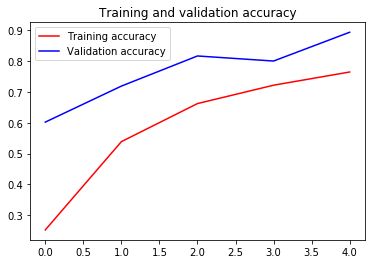

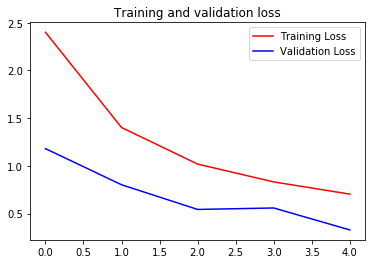

In [10]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()